<a href="https://colab.research.google.com/github/dcordovao/neural_nerworks/blob/master/Enunciado_T2_Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Convolucionales y sus aplicaciones </H3>
<H3 align='center'> Camilo Maldonado - Diego C√≥rdova </H3>
<hr style="height:2px;border:none"/>

<div style="text-align: right"> 
  
**Temas**: Dise√±o y entrenamiento de Redes Neuronales Convolucionales (CNNs), Regularizaci√≥n en Redes Convolucionales, *Transfer Learning* y Aplicaciones de las Redes Neuronales Convolucionales
  
  </div>

<hr style="height:2px;border:none"/>


Secciones:

[1.](#primero) Convolutional Neural Networks (CNN) en CIFAR.  
[2.](#segundo) Transfer Learning.   
[3.](#tercero) Convolutional Neural Network sobre texto.



<a id="primero"></a>
## 1. Convolutional Neural Networks (CNN) en CIFAR10

En esta secci√≥n trabajaremos con CNN en un dataset bastante conocido y utilizado por la comunidad para experimentar reconocimiento de objetos en im√°genes: CIFAR10 [3]. Son 60.000 im√°genes RGB de 32x32 pixeles, que contienen las siguientes clases:

* Gato
* Perro
* Rana
* Caballo
* P√°jaro
* Ciervo
* Avi√≥n
* Autom√≥vil
* Cami√≥n 
* Barco



#### Se importan librer√≠as necesarias


In [0]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler, Callback
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras import regularizers
import numpy as np   
import os   
from keras.datasets import cifar10
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
from keras import regularizers


%matplotlib inline

Using TensorFlow backend.


### Primero definimos nuestros conjuntos de datos
(i) dos matrices  x_train, y_train correspondientes a las im√°genes y etiquetas de entrenamiento  
(ii) dos matrices x_test, y_test correspondientes a las im√°genes y etiquetas de pruebas  
(iii) dos matrices x_val, y_val correspondientes a las im√°genes y etiquetas que se usar√°n como conjunto de validaci√≥n

Cada conjunto tiene su fin, (i) para entrenar el modelo y (ii) para determinar la calidad del modelo. Por √∫ltimo tenemos los dato de validaci√≥n para determinar par√°metros en el modelo

In [0]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Validation Data
x_val = x_train[:5000]
y_val = y_train[:5000]
# Remove validation data from training data
x_train = x_train[5000:]
y_train = y_train[5000:]

### Corroboramos un poco de la data para darnos una idea bajo el tipo de dato que estamos trabajando

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


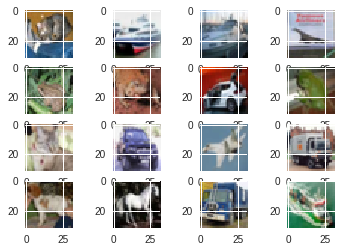

In [0]:
# Show images in group of 4
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
show_imgs(x_test[:16])

### Normalizamos los datos
Normalizamos y transformamos los *target* para trabajarlo bajo clases: La normalizaci√≥n es para poder trabajar de mejor manera independiente de la escala de valor de los datos y las clases para una classificaci√≥n multiclase.

In [0]:
# Shape (32,32,3)
x_train = x_train/255 
x_test = x_test/255 
x_val = x_val/255

# Creates categories
num_classes = len(label_names)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

### Definimos una CNN ($C \times P \times C \times P \times F \times F$)


* C: Capa convolucional de 64 mapeos de filtro, con filtro de 3x3. Cada una tiene una funci√≥nd e activaci√≥n ReLU.
* P: Capa de pooling de tama√±o 2x2, con stride 2. 
* F: La capa MLP tendr√° 512 en la primera capa de entrada y la de salida con 10 neuronas para cada clase.

In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

### Dimensionalidad a trav√©s de la red

La red recibe una imagen RGB de tama√±o 32x32x3, donde la primera capa convolucional no modifica la dimensionalidad ya que trabaja con 64 mapeos de tama√±o 32x32x3. En la primera capa de  pooling baja a 1 cuarto los tama√±os de la imagen con la misma cantidad de mapeos (16x16x3). La dimensi√≥n no cambia hasta el siguiente pooling donde es la misma idea, baja a 1 cuarto la dimensionalidad, manteniendo la cantidad de mapeos. Luego se pasa a un arreglo completo de tama√±o 1x4096, que entra a la MLP.

### Funciones auxiliares

La primera nos permitir√° obtener la evaluaci√≥n del modelo en los diferentes epochs, es decir su precisi√≥n y p√©rdida dela funci√≥n de coste. La segunda permite que a trav√©s del transcurso de epoch el learning rate vaya bajando para que no tenga problemas al converger, se usa debido a que necesita algunos pasos mayores al inicio y luego ir achicandolos.

In [0]:
# Auxiliar function

# https://github.com/keras-team/keras/issues/2548?fbclid=IwAR0sPb66MnT8TwpkDl3oVfHaDQvWeMRYC_H_Tw30-ycZqGyWxDdU53tppG4#issuecomment-215664770
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        test_loss.append(loss)
        test_acc.append(acc)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
    
        
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate

### Entrenamiento CNN simple (Con step decay y SGD)

In [0]:
epochs = 25
batch_size = 128

test_loss = []
test_acc = []


 
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))])

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 11s 247us/step - loss: 2.1742 - acc: 0.2148 - val_loss: 2.0034 - val_acc: 0.2916

Testing loss: 2.011762713432312, acc: 0.2916

Epoch 2/25
45000/45000 [==============================] - 7s 154us/step - loss: 1.9249 - acc: 0.3220 - val_loss: 1.8463 - val_acc: 0.3490

Testing loss: 1.8472266117095948, acc: 0.3483

Epoch 3/25
45000/45000 [==============================] - 7s 155us/step - loss: 1.7994 - acc: 0.3717 - val_loss: 1.7460 - val_acc: 0.3878

Testing loss: 1.742569186782837, acc: 0.3874

Epoch 4/25
45000/45000 [==============================] - 7s 155us/step - loss: 1.6844 - acc: 0.4103 - val_loss: 1.6065 - val_acc: 0.4400

Testing loss: 1.613213780593872, acc: 0.4359

Epoch 5/25
45000/45000 [==============================] - 7s 154us/step - loss: 1.5720 - acc: 0.4494 - val_loss: 1.5265 - val_acc: 0.4682

Testing loss: 1.5262284826278687, acc: 0.4694

Epoch 6/25
45000/45000 

#### Graficamos lo obtenido del modelo 

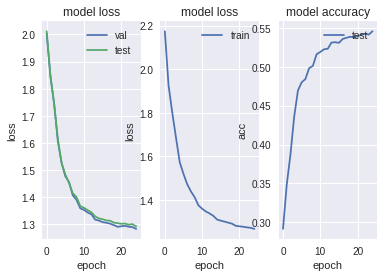

In [0]:
# summary of training and testing history 
plt.subplot(1,3,1)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

plt.subplot(1,3,3)
plt.plot(test_acc)
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()



##### Entrenamiento
Se puede observar que no ocurre overfitting y adem√°s los datos de test no van muy alejados de los de validaci√≥n. Adem√°s se presenta una buena precisi√≥n del testing que  llega hasta 0.5456, es decir casi un 55% de precisi√≥n.

### Entrenamiento red simple CNN (con RMSProp y step decay)

In [0]:
batch_size = 128
epochs = 25
test_loss = []
test_acc = []

lrate = LearningRateScheduler(step_decay)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))])

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
45000/45000 [==============================] - 8s 175us/step - loss: 0.8298 - acc: 0.7146 - val_loss: 0.9275 - val_acc: 0.6758

Testing loss: 0.9475037983894348, acc: 0.6747

Epoch 2/25
45000/45000 [==============================] - 8s 167us/step - loss: 0.6676 - acc: 0.7703 - val_loss: 1.1107 - val_acc: 0.6486

Testing loss: 1.1097404185295106, acc: 0.6457

Epoch 3/25
45000/45000 [==============================] - 8s 168us/step - loss: 0.5274 - acc: 0.8183 - val_loss: 0.9507 - val_acc: 0.6972

Testing loss: 0.9840279175758362, acc: 0.6925

Epoch 4/25
45000/45000 [==============================] - 8s 167us/step - loss: 0.3992 - acc: 0.8641 - val_loss: 1.0653 - val_acc: 0.6808

Testing loss: 1.0898826288223267, acc: 0.6677

Epoch 5/25
45000/45000 [==============================] - 8s 167us/step - loss: 0.1972 - acc: 0.9383 - val_loss: 1.0778 - val_acc: 0.7202

Testing loss: 1.0860445314407348, acc: 0.7121

Epoch 6/25
45000/4500

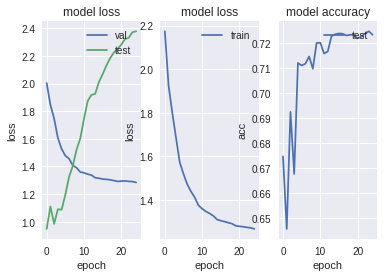

In [0]:
# summary of training and testing history 
plt.subplot(1,3,1)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

plt.subplot(1,3,3)
plt.plot(test_acc)
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.show()


#### Entrenamiento
Se ve claramente un modelo mejor que aunque tenga un mayor valor de p√©rdida para el de testing, se tiene una buena precisi√≥n desde el inicio. Aunque cabe destacar que tiende a ser m√°s err√°tico entre epochs este optimizador.

### Efecto del tama√±o de filtro en shallow y deep network

Se evaluar√°n diferentes tama√±os de filtros para dos tipos de redes, para una comparaci√≥n de sus errores a trav√©s de gr√°ficos.

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 11s - loss: 2.0929 - acc: 0.2630 - val_loss: 1.9606 - val_acc: 0.3224

Testing loss: 1.9699932762145995, acc: 0.3202

Epoch 2/15
 - 7s - loss: 1.9154 - acc: 0.3369 - val_loss: 1.8610 - val_acc: 0.3454

Testing loss: 1.8756475276947022, acc: 0.3464

Epoch 3/15
 - 7s - loss: 1.8496 - acc: 0.3586 - val_loss: 1.8071 - val_acc: 0.3718

Testing loss: 1.8178667348861695, acc: 0.3651

Epoch 4/15
 - 7s - loss: 1.7993 - acc: 0.3758 - val_loss: 1.7773 - val_acc: 0.3796

Testing loss: 1.7821947639465332, acc: 0.3779

Epoch 5/15
 - 7s - loss: 1.7621 - acc: 0.3903 - val_loss: 1.7459 - val_acc: 0.3952

Testing loss: 1.7540371961593628, acc: 0.392

Epoch 6/15
 - 7s - loss: 1.7395 - acc: 0.3990 - val_loss: 1.7211 - val_acc: 0.3966

Testing loss: 1.7302427528381348, acc: 0.396

Epoch 7/15
 - 7s - loss: 1.7200 - acc: 0.4038 - val_loss: 1.7168 - val_acc: 0.3964

Testing loss: 1.7190465141296387, acc: 0.3994

Epoch 8/15
 - 7s - loss: 1.7007 - a

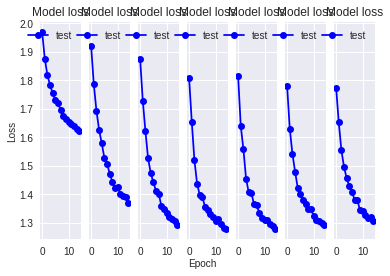

In [0]:
plot = 0
f, axarr = plt.subplots(1,7, sharey=True)
batch_size = 128
f.text(0.5, 0.04, 'Epoch', ha='center', va='center')
f.text(0.06, 0.5, 'Loss', ha='center', va='center', rotation='vertical')
       
for nc in [1,3,5,10,15,20,30]:
  epochs = 15
  test_loss = []
  test_acc = []
  
  # Shallow network
  model = Sequential()
  model.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
  lrate = LearningRateScheduler(step_decay)
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)
  
  # Two subplots, the axes array is 1-d

  axarr[plot].plot(test_loss,'bo-')
  axarr[plot].set_title('Model loss')
  axarr[plot].legend(['test'], loc='upper right')
  plot += 1

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 18s - loss: 1.9176 - acc: 0.3136 - val_loss: 1.6375 - val_acc: 0.4240
Epoch 2/15
 - 16s - loss: 1.5346 - acc: 0.4544 - val_loss: 1.4204 - val_acc: 0.4974
Epoch 3/15
 - 16s - loss: 1.3683 - acc: 0.5138 - val_loss: 1.2830 - val_acc: 0.5442
Epoch 4/15
 - 16s - loss: 1.2615 - acc: 0.5548 - val_loss: 1.2148 - val_acc: 0.5688
Epoch 5/15
 - 16s - loss: 1.1573 - acc: 0.5946 - val_loss: 1.1524 - val_acc: 0.5948
Epoch 6/15
 - 16s - loss: 1.1099 - acc: 0.6115 - val_loss: 1.1167 - val_acc: 0.6094
Epoch 7/15
 - 16s - loss: 1.0648 - acc: 0.6287 - val_loss: 1.1471 - val_acc: 0.5926
Epoch 8/15
 - 16s - loss: 1.0279 - acc: 0.6414 - val_loss: 1.0683 - val_acc: 0.6208
Epoch 9/15
 - 16s - loss: 0.9869 - acc: 0.6566 - val_loss: 1.0835 - val_acc: 0.6192
Epoch 10/15
 - 16s - loss: 0.9274 - acc: 0.6810 - val_loss: 1.0142 - val_acc: 0.6426
Epoch 11/15
 - 16s - loss: 0.9046 - acc: 0.6878 - val_loss: 1.0260 - val_acc: 0.6436
Epoch 12/15
 - 16s - loss

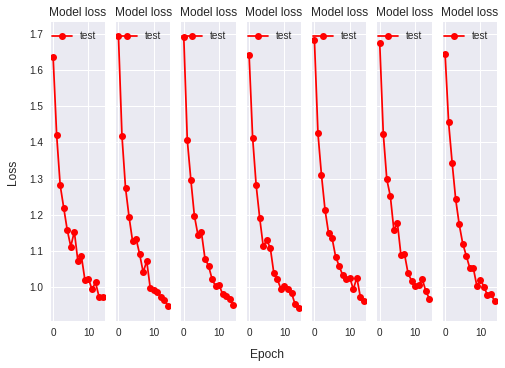

In [0]:
plot = 0
f, axarr = plt.subplots(1,7, sharey=True)
batch_size = 32
f.text(0.5, 0.04, 'Epoch', ha='center', va='center')
f.text(0.06, 0.5, 'Loss', ha='center', va='center', rotation='vertical')
       
for nc in [1,3,5,10,15,20,30]:
  epochs = 15
  test_loss = []
  test_acc = []
  
  # deep network
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
  lrate = LearningRateScheduler(step_decay)
  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)
  
  # Two subplots, the axes array is 1-d


  axarr[plot].plot(test_loss,'ro-')
  axarr[plot].set_title('Model loss')
  axarr[plot].legend(['test'], loc='upper right')
  plot += 1

#### Entrenamiento y gr√°ficos
Se puede observar que para la *Shallow network* los valores de filtros que mejor funcionan en pocos epochs son que tienden no ser muy grandes pero a la vez tampoco exageradamente peque√±os, en este caso 5x5 y 10x10. Por otor lado para la red m√°s prfunda no tiene gran influencia el tama√±o pero muy levemente igual muestra mejores valores para 10x10.

### Comparaci√≥n ùê∂√óùëÉ√óùê∂√óùëÉ√óùêπ√óùêπ  versus  ùê∂√óùê∂√óùëÉ√óùê∂√óùê∂√óùëÉ√óùêπ√óùêπ

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
activation_20 (Activation)   (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
__________

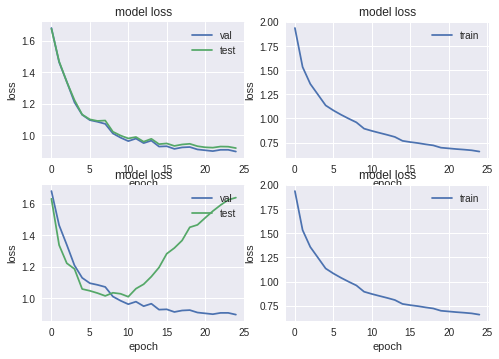

In [0]:
batch_size = 32
epochs = 25

# Model 1
test_loss = []
test_acc = []
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# Model 2
modelD = Sequential()
modelD.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
modelD.add(Activation('relu'))
modelD.add(Conv2D(64, (3, 3), padding='same'))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
modelD.add(Activation('relu'))
modelD.add(Conv2D(128, (3, 3), padding='same'))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Flatten())
modelD.add(Dense(512))
modelD.add(Activation('relu'))
modelD.add(Dense(10))
modelD.add(Activation('softmax'))
modelD.summary()

# Training and testing model 1
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

# Plot validation and test data
plt.subplot(2,2,1)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

# Training and testing model 2
test_loss = []
test_acc = []
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
modelD.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyD = modelD.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

# Plot validation and test data
plt.subplot(2,2,3)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,4)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()R

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 64)        9472      
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 128)       401536    
_________________________________________________________________
activation_30 (Activation)   (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
__________

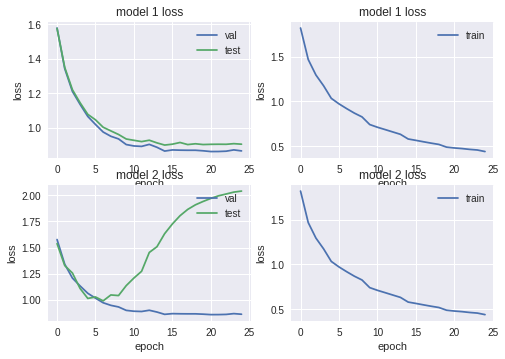

In [0]:
batch_size = 32
epochs = 25

# Model 1
test_loss = []
test_acc = []
model = Sequential()
model.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:],strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (7, 7), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# Model 2
modelD = Sequential()
modelD.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:]))
modelD.add(Activation('relu'))
modelD.add(Conv2D(64, (7, 7), padding='same'))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Conv2D(128, (7, 7), padding='same', input_shape=x_train.shape[1:]))
modelD.add(Activation('relu'))
modelD.add(Conv2D(128, (7, 7), padding='same'))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Flatten())
modelD.add(Dense(512))
modelD.add(Activation('relu'))
modelD.add(Dense(10))
modelD.add(Activation('softmax'))
modelD.summary()

# Training and testing model 1
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

# Plot validation and test data
plt.subplot(2,2,1)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

# Training and testing model 2
test_loss = []
test_acc = []
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
modelD.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyD = modelD.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

# Plot validation and test data
plt.subplot(2,2,3)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,4)
plt.plot(history.history['loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 35s - loss: 2.2095 - acc: 0.2486 - val_loss: 1.6857 - val_acc: 0.4058

Testing loss: 1.6994706624984741, acc: 0.3953

Epoch 2/25
 - 33s - loss: 1.6645 - acc: 0.4170 - val_loss: 1.5303 - val_acc: 0.4904

Testing loss: 1.5412471696853638, acc: 0.4846

Epoch 3/25
 - 33s - loss: 1.4848 - acc: 0.5004 - val_loss: 1.5014 - val_acc: 0.5160

Testing loss: 1.5124947093963623, acc: 0.5056

Epoch 4/25
 - 33s - loss: 1.3582 - acc: 0.5534 - val_loss: 1.2510 - val_acc: 0.5844

Testing loss: 1.261657691192627, acc: 0.5827

Epoch 5/25
 - 33s - loss: 1.1295 - acc: 0.6280 - val_loss: 1.0339 - val_acc: 0.6606

Testing loss: 1.0430527046203613, acc: 0.6587

Epoch 6/25
 - 32s - loss: 1.0774 - acc: 0.6484 - val_loss: 1.0167 - val_acc: 0.6694

Testing loss: 1.0449931650161743, acc: 0.6629

Epoch 7/25
 - 33s - loss: 1.0380 - acc: 0.6646 - val_loss: 1.0879 - val_acc: 0.6514

Testing loss: 1.115525527572632, acc: 0.6409

Epoch 8/25
 - 32s - loss: 1.0

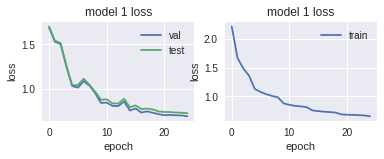

In [0]:
batch_size = 128
epochs = 25

# Model 2
modelD = Sequential()
modelD.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
modelD.add(Activation('relu'))
modelD.add(Conv2D(64, (5, 5), padding='same',kernel_regularizer=regularizers.l2(0.01)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Dropout(0.3))
modelD.add(Conv2D(128, (10, 10), padding='same', input_shape=x_train.shape[1:]))
modelD.add(Activation('relu'))
modelD.add(Conv2D(128, (12, 12), padding='same',kernel_regularizer=regularizers.l2(0.01)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Dropout(0.5))
modelD.add(Flatten())
modelD.add(Dense(512))
modelD.add(Activation('relu'))
modelD.add(Dense(10))
modelD.add(Activation('softmax'))
#modelD.summary()

test_loss = []
test_acc = []
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
modelD.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = modelD.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

# Plot validation and test data
plt.subplot(2,2,1)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')


### Entrenamiento
Se pudo observar que al correr ambos modelos, sin regularizadores y dropout el modelo mas profundo produce overfitting muy r√°pido, pero al agregar los regularizadores y dropout mejora el comportamiento de la red m√°s profundo a trav√©s de los epochs. Adem√°s se ve de mejor desempe√±o la red profundo, igual se prov√≥ con filtros mayores al inicio y al final, resultando de mejor manera que son m√°s convenientes los filtros m√°s grande en capas m√°s profundas.

> **h)** Algunos investigadores, han propuesto que las capas de *pooling* se pueden reemplazar por capas convoluciones con stride 2. ¬øSe reduce dimensionalidad de este modo? Compru√©belo verificando los cambios de forma (dimensionalidad) que experimenta un patr√≥n de entrada a medida que se ejecuta un *forward-pass*.  
Entrene la red resultante con el m√©todo que prefiera, gr√°ficando los errores de entrenamiento, validaci√≥n y pruebas como funci√≥n del n√∫mero de ‚Äúepochs‚Äù (fijando el m√°ximo en un n√∫mero razonable como T = 25).
```python
...
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
...
```

### Stride v/s pooling

En este punto se ver√° la diferencia entre ocupar una capa de pooling o una convolucional  con stride 2.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 64)        9472      
_________________________________________________________________
activation_81 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 128)       401536    
_________________________________________________________________
activation_82 (Activation)   (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 8192)              0         
__________

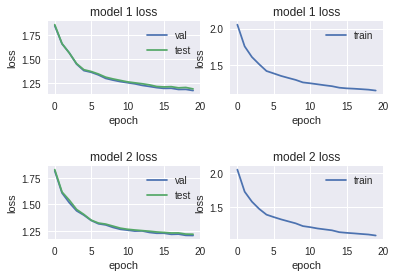

In [0]:
batch_size = 128
epochs = 20

plt.subplots_adjust(hspace = 1)

# Model 1
test_loss = []
test_acc = []
model = Sequential()
model.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:],strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (7, 7), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# Model 2
test_loss = []
test_acc = []
modelD = Sequential()
modelD.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:],strides=(1, 1)))
modelD.add(Activation('relu'))
modelD.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
modelD.add(Conv2D(128, (7, 7), padding='same'))
modelD.add(Activation('relu'))
modelD.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
modelD.add(Flatten())
modelD.add(Dense(512))
modelD.add(Activation('relu'))
modelD.add(Dense(10))
modelD.add(Activation('softmax'))
modelD.summary()

# Training and testing model 1
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

# Plot validation and test data
plt.subplot(2,2,1)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

# Training and testing model 2
test_loss = []
test_acc = []
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
modelD.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
historyD = modelD.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

# Plot validation and test data
plt.subplot(2,2,3)
plt.plot(historyD.history['val_loss'])
plt.plot(test_loss)
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,4)
plt.plot(historyD.history['loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

#### Entrenamiento
Se puede ver que no hay casi diferencia entre ambos m√©todos, siendo equivalentes a priori, pero si se ven los epochs se puede ver que es m√°s r√°pido usa rpooling, ya que el costo es mucho menor. Al final si ambos m√©todos son casi equivalentes, conviene usar pooling por la eficiencia de ejecuci√≥n

### Generaci√≥n de datos (con rotaciones y medas)

Compararemos uno de los modelos anteriores y su desempe√±o con los datos normal, con el mismo modelo pero para datos donde se le agregan peque√±as perturbaciones a los datos que se tienen para generar un mayor conglomerado.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 32, 32, 64)        9472      
_________________________________________________________________
activation_89 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 16, 16, 128)       401536    
_________________________________________________________________
activation_90 (Activation)   (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 8192)              0         
__________

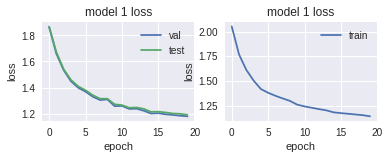

In [0]:
# Model 1
test_loss = []
test_acc = []
model = Sequential()
model.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:],strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (7, 7), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# Training and testing model 1
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

# Plot validation and test data
plt.subplot(2,2,1)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

Epoch 1/20
351/351 [==============================] - 31s 87ms/step - loss: 1.3382 - acc: 0.5248 - val_loss: 1.2070 - val_acc: 0.5775

Testing loss: 1.2070048675537108, acc: 0.5775

Epoch 2/20
351/351 [==============================] - 30s 87ms/step - loss: 1.2982 - acc: 0.5429 - val_loss: 1.2560 - val_acc: 0.5608

Testing loss: 1.256046616744995, acc: 0.5608

Epoch 3/20
351/351 [==============================] - 29s 84ms/step - loss: 1.2585 - acc: 0.5579 - val_loss: 1.1421 - val_acc: 0.6035

Testing loss: 1.1420508375167846, acc: 0.6035

Epoch 4/20
351/351 [==============================] - 29s 82ms/step - loss: 1.2385 - acc: 0.5614 - val_loss: 1.1725 - val_acc: 0.5788

Testing loss: 1.1725222967147828, acc: 0.5788

Epoch 5/20
351/351 [==============================] - 29s 83ms/step - loss: 1.1941 - acc: 0.5809 - val_loss: 1.0980 - val_acc: 0.6183

Testing loss: 1.0980196048736572, acc: 0.6183

Epoch 6/20
351/351 [==============================] - 28s 81ms/step - loss: 1.1725 - acc: 0

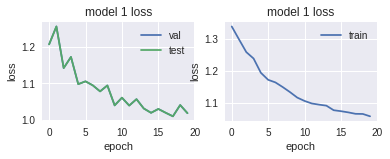

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)

test_loss = []
test_acc = []
history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,validation_data=(x_test, y_test),callbacks=[lrate,TestCallback((x_test, y_test))])

# Plot validation and test data
plt.subplot(2,2,1)
plt.plot(history.history['val_loss'])
plt.plot(test_loss)
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val','test'], loc='upper right')

# Plot training loss
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

#### Entrenamiento
Se ve una mejora en la precisi√≥n del modelo con datos generados, para los datos de testing. A la vez se ve una mejora a trav√©s de los epochs m√°s err√°tica en los gr√°ficos.

> **j)** Para una comparaci√≥n del desempe√±o de la red neuronal, pre-procese el dataset de CIFAR-10 y calcule los descriptores manuales SIFT, para un mejor entendimiento de √©stos consulte:  https://ianlondon.github.io/blog/how-to-sift-opencv/ y https://docs.opencv.org/3.4.3/da/df5/tutorial_py_sift_intro.html. Como se genera un descriptor de 128 dimensiones para cada *keypoint* comprima esta informaci√≥n de alguna manera, comente sobre la operaci√≥n.

> Es necesario instalar *OpenCV* para realizar el c√°lculo de este descriptor.  
```python
!pip install opencv-python==3.1 opencv-contrib-python==3.4.2.16
```
  

>```python
import cv2
def pre_process(img):
    if np.max(img) <= 1:
        img*=255
    img = img.astype("uint8")
    img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray
def calculate_sift(cifar):
    sift_cifar = []
    for image in cifar:
      img_gray = pre_process(image)
      sift = cv2.xfeatures2d.SIFT_create()
      kp, desc = sift.detectAndCompute(img_gray, None)
      if type(desc) == type(None):
        desc = np.zeros((1,128))
      compress_desc = np.mean(desc,axis=0) #compress all keypoints
      sift_cifar.append(compress_desc)
    return np.asarray(sift_cifar)
cifar_sift = calculate_sift(X)
```
*Recuerde escalar los datos antes de entreg√°rselos al modelo*

> **j.1)** Visualice los *keypoint* para una mejor comprensi√≥n visual de lo que son los descriptores manuales en alguna imagen aleatoria.
```python
sample_image = X[sample_index]
gray_sample_image = pre_process(sample_image)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray_sample_image, None)
"""draw and plot"""
img=cv2.drawKeypoints(gray_sample_image,kp,sample_image)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
```

> Entrene una red neuronal densa (la misma que sigue a las capas convoluciones definidas en los modelos previos), compare el desempe√±o de la red con el modelo m√°s b√°sico (o de peor desempe√±o) y el modelo de mejor desempe√±o obtenido hasta este punto. Comente sobre el entrenamiento (error y tiempos de ejecuci√≥n) y resultados.


### Pre-procesamiento de los datos
Se pre-procesar√°n los datos a trav√©s de SIFT, adem√°s se muestra la imagen obtenida al azar del conjunto de entrenmiento y sus *keypoints*


In [0]:
!pip uninstall opencv-python
!pip install opencv-python==3.1.0.4 opencv-contrib-python==3.4.2.16

Uninstalling opencv-python-3.4.3.18:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-3.4.3.18.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-3.4.3.18
    100% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.2MB 4.1MB/s 
    100% |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30.6MB 1.3MB/s 


#### Funciones para procesar

In [0]:
import cv2
def pre_process(img):
    if np.max(img) <= 1:
        img*=255
    img = img.astype("uint8")
    img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray
def calculate_sift(cifar):
    sift_cifar = []
    for image in cifar:
      img_gray = pre_process(image)
      sift = cv2.xfeatures2d.SIFT_create()
      kp, desc = sift.detectAndCompute(img_gray, None)
      if type(desc) == type(None):
        desc = np.zeros((1,128))
      compress_desc = np.mean(desc,axis=0) #compress all keypoints
      sift_cifar.append(compress_desc)
    return np.asarray(sift_cifar)
#cifar_sift = calculate_sift(x_train)

Obervamos la obtenci√≥n de los *keypoints* de una imagen elegida aleatoriamente.

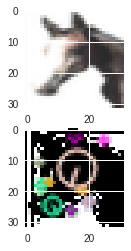

In [0]:
index_random = np.random.randint(x_train.shape[0])
sample_image = x_train[index_random]
sample_image = sample_image.astype("uint8")
gray_sample_image = pre_process(sample_image)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray_sample_image, None)
"""draw and plot"""
img=cv2.drawKeypoints(gray_sample_image,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.imshow(x_train[index_random])
plt.subplot(2,1,2)
plt.imshow(img)
plt.show()

### Deep Network con mal desempe√±o (Sin pre-procesar v/s pre-procesadas)

Ahora elegimos un modelo profundo de los anteriores para entrenar data no procesada y pre-procesada, para ver la diferencia.


In [0]:
batch_size = 128
epochs = 25

from keras import regularizers

# Model Pre-process
model = Sequential()
model.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:],kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(64, (7, 7), padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:],kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# Whitout Pre-processing data
test_loss = []
test_acc = []
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history1 = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[TestCallback((x_test, y_test))],verbose=2)
test_loss_m1 = np.array(test_loss)
test_acc_m1 = np.array(test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        9472      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        200768    
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [0]:
# Pre-processing data
x_train_sift = calculate_sift(x_train)
x_test_sift = calculate_sift(x_test)
x_val_sift = calculate_sift(x_val)
# Normalizate
x_train_sift = x_train_sift.reshape(45000,16,8,1)
x_test_sift = x_test_sift.reshape(10000,16,8,1)
x_val_sift = x_val_sift.reshape(5000,16,8,1)

In [0]:
# Model
model = Sequential()
model.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train_sift.shape[1:],kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(64, (7, 7), padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train_sift.shape[1:],kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

test_loss = []
test_acc = []
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(x_train_sift, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val_sift,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test_sift, y_test))],verbose=2)
test_loss_m2 = np.array(test_loss)
test_acc_m2 = np.array(test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 16, 8, 64)         3200      
_________________________________________________________________
activation_7 (Activation)    (None, 16, 8, 64)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 8, 64)         200768    
_________________________________________________________________
activation_8 (Activation)    (None, 16, 8, 64)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 4, 128)         73856     
__________

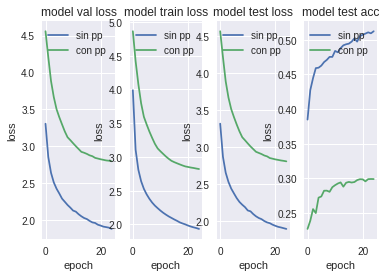

In [0]:
# Plot validation loss
plt.subplot(1,4,1)
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('model val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sin pp','con pp'], loc='upper right')

# Plot training loss
plt.subplot(1,4,2)
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sin pp','con pp'], loc='upper right')

# Plot validation and test data
plt.subplot(1,4,3)
plt.plot(test_loss_m1)
plt.plot(test_loss_m2)
plt.title('model test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sin pp','con pp'], loc='upper right')

# Plot training loss
plt.subplot(1,4,4)
plt.plot(test_acc_m1)
plt.plot(test_acc_m2)
plt.title('model test acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['sin pp','con pp'], loc='upper right')

#### Entrenamiento
Se puede ver que el desempe√±o al pre-procesar los datos es peor y puede ser debido a que la red debe aprender m√°s cualidades o posibles cualidades de una clase, lo cual lo hace m√°s complejo y puede que requiera una red m√°s profunda o de mayor densidad. 

> **k)** Elija una de las redes entrenadas en esta secci√≥n (preferentemente una con buen desempe√±o) y determine los pares de objetos (por ejemplo ‚Äúcamiones‚Äù con ‚Äúautos‚Äù) que la red tiende a confundir. Conjeture el motivo de tal confusi√≥n.

### Predicci√≥n de pares de objetos
Ahora nos interesa buscar las predicciones malas de nuestro modelo, es decir cuando predijo mal una clase y adem√°s por cual de las clases predijo mal, es decir: eligi√≥ auto cuando debi√≥ ser cami√≥n. 

In [0]:
# Model
test_loss = []
test_acc = []
model = Sequential()
model.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:],strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (7, 7), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# Training and testing model 1
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 64)        9472      
_________________________________________________________________
activation_59 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 128)       401536    
_________________________________________________________________
activation_60 (Activation)   (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
__________

In [0]:
predic = model.predict(x_test)
pairs = np.where(predic != y_test)
row,col = pairs
pair = []
all_pairs = []
for i in range(len(row)):
  if len(pair)==0:
    pair.append(label_names[col[i]])
  elif len(pair)==1:
    pair.append(label_names[col[i]])
    all_pairs.append(pair)
    pair = []

all_pairs = np.array(all_pairs)

In [0]:
animals = ['bird','cat','deer','dog','frog','horse']
ve = ['airplane','automobile','truck','ship']
eq = 0; dif=0;
for p in all_pairs:
  if (p[0] in animals and p[1] in ve) or (p[0] in ve and p[1] in animals):
    dif = dif+1
  else:
    eq = eq+1
print(eq,dif)

50000 0


#### Entrenamieto
Observando que hay dos tipos de clases, de forma global podr√≠an verse como animales y veh√≠culos. En la parte del c√≥digo se cont√≥ la cantidad de errores que habia entre una misma clasificaci√≥n y entre ambas, concluyendo que todos los errores de predicci√≥n eran entre clases de la misma clasificaci√≥n, es decir entre animal-animal o veh√≥culo-veh√≠culo. Lo cual nos demuestra que igual afecta como al grupo de clases que pertenecen las im√°genes.

###¬†Visualizaci√≥n de pesos y efecto de filtros
Aqu√≠ se mostrar√°n primero como afectan las difernetes capas a una imagen y adem√°s como quedan los pesos de la primera y √∫ltima cpa convolucional de la red, sin entrenar y entrenada.

In [0]:
def printer(model, im):
    '''prints the cat as a 2d array'''
    im_batch = np.expand_dims(im,axis=0)
    conv_im2 = model.predict(im_batch)

    conv_im2 = np.squeeze(conv_im2, axis=0)
    #print(conv_im2.shape)
    conv_im2 = conv_im2.reshape(conv_im2.shape[:2])

    #print(conv_im2.shape)
    plt.imshow(conv_im2)
    plt.show()

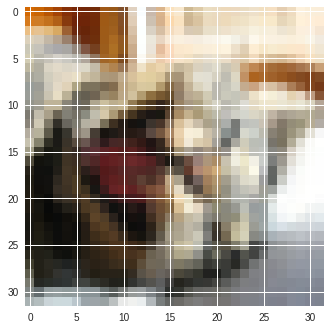

Primera convolucional


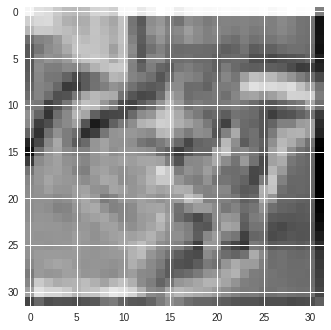

Primera relu


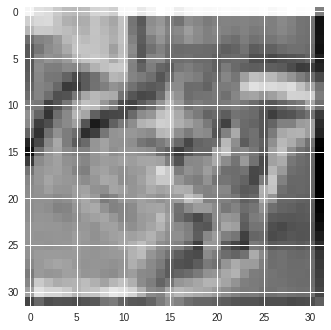

Segunda convolucional


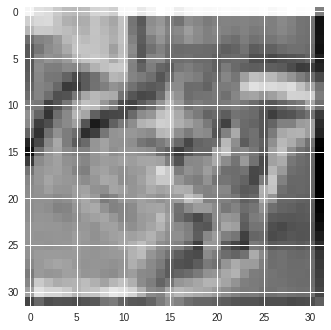

segunda relu


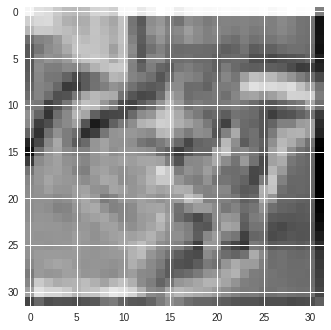

pooling, dropout y tercera convolucional


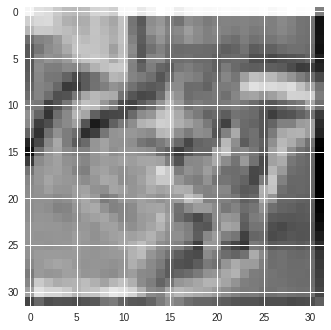

tercera relu


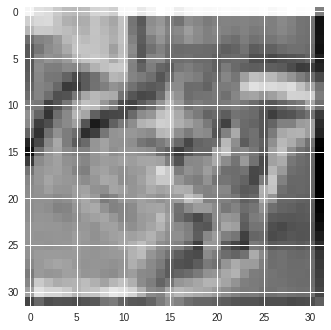

cuarta convolucion


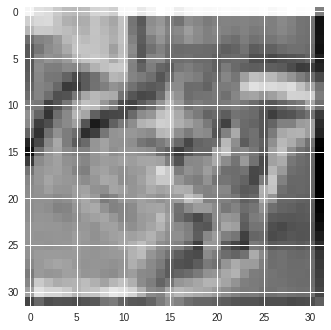

cuarta relu


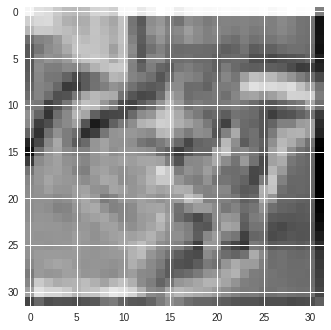

In [0]:
img = x_train[np.random.randint(x_train.shape[0])]
plt.imshow(img)
plt.show()

# Model
modelD = Sequential()
print('Primera convolucional')
modelD.add(Conv2D(1, (3, 3), padding='same', input_shape=img.shape,kernel_regularizer=regularizers.l2(0.01)))
printer(modelD,img)
print('Primera relu')
modelD.add(Activation('relu'))
printer(modelD,img)
print('Segunda convolucional')
modelD.add(Conv2D(1, (2, 2), padding='same',kernel_regularizer=regularizers.l2(0.01)))
printer(modelD,img)
print('segunda relu')
modelD.add(Activation('relu'))
printer(modelD,img)
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Dropout(0.2))
print('pooling, dropout y tercera convolucional')
modelD.add(Conv2D(1, (10, 10), padding='same', input_shape=img.shape,kernel_regularizer=regularizers.l2(0.01)))
printer(modelD,img)
print('tercera relu')
modelD.add(Activation('relu'))
printer(modelD,img)
print('cuarta convolucion')
modelD.add(Conv2D(1, (10, 10), padding='same',kernel_regularizer=regularizers.l2(0.01)))
printer(modelD,img)
print('cuarta relu')
modelD.add(Activation('relu'))
printer(modelD,img)
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Dropout(0.5))
modelD.add(Flatten())
modelD.add(Dense(512))
#printer(modelD,img)
modelD.add(Activation('relu'))
#printer(modelD,img)
modelD.add(Dense(10))
#printer(modelD,img)
modelD.add(Activation('softmax'))
#modelD.summary()

#### Entrenamiento
Se puede observar que la imagen se va distorsionando con el fin de obtener diferentes caracter√≠sticas, por ejemplo lo m√°s notorio es la transformaci√≥n del feature a la primera capa a la convolucion donde se peude ver la enfatizaci√≥n en los relieves de contornos de la imagen.

#### Definimos el modelo, para visualizar sin entrenar

In [0]:
# Model 2
modelD = Sequential()
modelD.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:],kernel_regularizer=regularizers.l2(0.01)))
modelD.add(Activation('relu'))
modelD.add(Conv2D(64, (7, 7), padding='same',kernel_regularizer=regularizers.l2(0.01)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Dropout(0.2))
modelD.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:],kernel_regularizer=regularizers.l2(0.01)))
modelD.add(Activation('relu'))
modelD.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01)))
modelD.add(Activation('relu'))
modelD.add(MaxPooling2D(pool_size=(2, 2)))
modelD.add(Dropout(0.5))
modelD.add(Flatten())
modelD.add(Dense(512))
modelD.add(Activation('relu'))
modelD.add(Dense(10))
modelD.add(Activation('softmax'))
modelD.summary()

test_loss = []
test_acc = []
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
modelD.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# history = modelD.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 64)        9472      
_________________________________________________________________
activation_67 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 64)        200768    
_________________________________________________________________
activation_68 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 128)       73856     
__________

### Pesos sin entrenar

Capa 1 Conv no entrenada


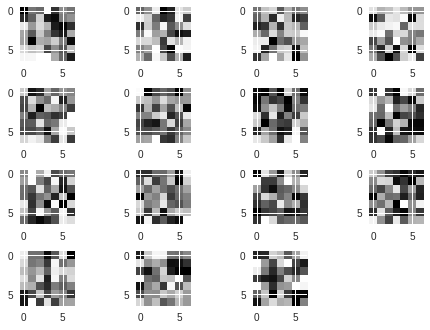

Ultima capa Conv no entrenada


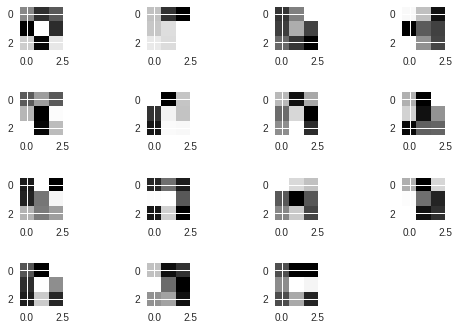

In [0]:
plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
print('Capa 1 Conv no entrenada')
w_l0 = modelD.layers[0].get_weights()[0][:,:,0,:]

for i in range(1,16):
  plt.subplot(4,4,i)
  plt.imshow(w_l0[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

print('Ultima capa Conv no entrenada')
w_lf = modelD.layers[8].get_weights()[0][:,:,0,:]
plt.subplots_adjust(wspace = 1.0,hspace = 1)
for i in range(1,16):
  plt.subplot(4,4,i)
  plt.imshow(w_lf[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

#### Entrenamos el modelo

In [0]:
batch_size = 128
epochs = 20
history = modelD.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate,TestCallback((x_test, y_test))],verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 30s - loss: 4.8857 - acc: 0.1566 - val_loss: 4.4670 - val_acc: 0.2666

Testing loss: 4.480722567749023, acc: 0.2622

Epoch 2/20
 - 28s - loss: 4.2889 - acc: 0.2797 - val_loss: 4.0066 - val_acc: 0.3290

Testing loss: 4.016859199523926, acc: 0.3409

Epoch 3/20
 - 28s - loss: 3.8371 - acc: 0.3464 - val_loss: 3.5996 - val_acc: 0.3878

Testing loss: 3.610332260894775, acc: 0.395

Epoch 4/20
 - 28s - loss: 3.4732 - acc: 0.3837 - val_loss: 3.2635 - val_acc: 0.4110

Testing loss: 3.2692394039154054, acc: 0.4159

Epoch 5/20
 - 28s - loss: 3.2392 - acc: 0.4060 - val_loss: 3.1047 - val_acc: 0.4350

Testing loss: 3.1188772716522215, acc: 0.4374

Epoch 6/20
 - 28s - loss: 3.1087 - acc: 0.4160 - val_loss: 2.9792 - val_acc: 0.4568

Testing loss: 2.991234197998047, acc: 0.448

Epoch 7/20
 - 28s - loss: 2.9929 - acc: 0.4217 - val_loss: 2.8832 - val_acc: 0.4526

Testing loss: 2.896396452331543, acc: 0.4459

Epoch 8/20
 - 28s - loss: 2.8884 -

Capa 1 Conv entrenada


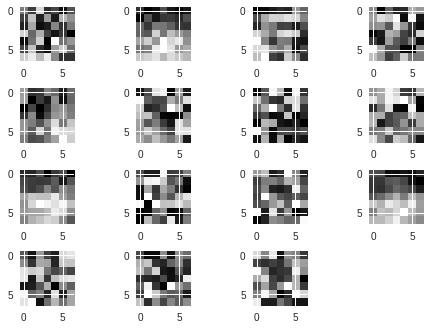

Ultima capa Conv entrenada


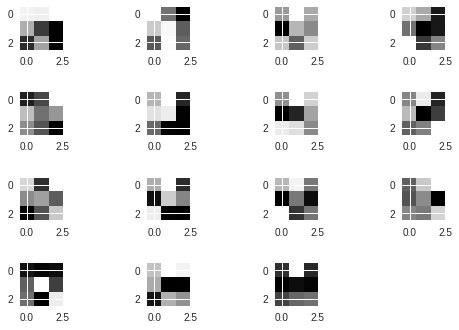

In [0]:
plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
print('Capa 1 Conv entrenada')
w_l0 = modelD.layers[0].get_weights()[0][:,:,0,:]

for i in range(1,16):
  plt.subplot(4,4,i)
  plt.imshow(w_l0[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

print('Ultima capa Conv entrenada')
w_lf = modelD.layers[8].get_weights()[0][:,:,0,:]
plt.subplots_adjust(wspace = 1.0,hspace = 1)
for i in range(1,16):
  plt.subplot(4,4,i)
  plt.imshow(w_lf[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

#### Entrenamiento 
Se puede observar que despu√©s de entrenar hay m√°s cantidad de pesos m√°s importantes (m√°s negros) que varian de acuerdo al mapeo (ya que cada map entrega diferentes caracter√≠sticas), adem√°s se puede ver que est√°n m√°s juntos y no colocados de forma tan aleatoria como antes de entrenar